In [7]:
import src
import numpy as np
import pyaldata
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

params = {
    'preload_params': {
        'verbose': True,
        'keep_unsorted': True,
        'bin_size': 0.001,
        'firing_rates_func': lambda td: pyaldata.add_firing_rates(td,method='smooth',std=0.05,backend='convolve'),
    },
    'epoch_fun': src.util.generate_realtime_epoch_fun(
        start_point_name='idx_ctHoldTime',
        end_point_name='idx_endTime',
    ),
}

filename = '../data/trial_data/Prez_20220721_RTTCST_TD.mat'
file_prefix = 'Prez_20220721_RTTCST'
td = src.data.load_clean_data(file_prefix,**params)


/Users/raeed/codebase/0-projects/cst-dynamics/src/pyaldata/pyaldata/data_cleaning.py:68: RuntimeWarning: invalid value encountered in cast
  int_arrays = [np.int32(arr) for arr in df[field]]
/Users/raeed/codebase/0-projects/cst-dynamics/env/lib/python3.10/site-packages/pandas/core/series.py:893: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self._values, dtype)


Removed 41 trials that monkey aborted
1 trials with high firing rates removed. Dropping trials with IDs:
[294]
M1: 8 correlated units removed
PMd: 0 correlated units removed
MC: 8 correlated units removed
Removed 0 neurons from M1_spikes.
Removed 2 neurons from MC_spikes.
Removed 2 neurons from PMd_spikes.


In [8]:
# concatenate all spikes into one array and calculate the fraction of channels that are active
spikes = np.row_stack(td['MC_spikes'])
frac_coincident = np.mean(spikes, axis=1)


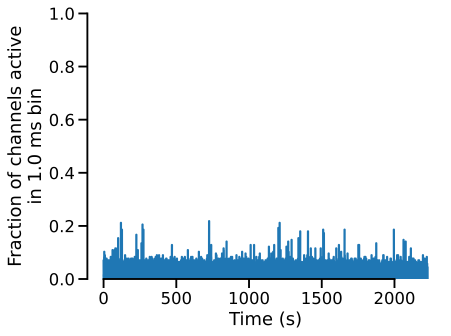

In [12]:
# plot the fraction of channels that are active
fig,ax = plt.subplots(1,1)
ax.plot(np.arange(frac_coincident.shape[0])*params['preload_params']['bin_size'],frac_coincident)
ax.set_ylim([0,1])
ax.set_xlabel('Time (s)')
ax.set_ylabel(f'Fraction of channels active\nin {params["preload_params"]["bin_size"]*1000} ms bin')
sns.despine(ax=ax,trim=True)



In [13]:
corr = np.corrcoef(spikes.T)
fig,ax = plt.subplots(1,1)
sns.heatmap(np.tril(corr,k=-1),ax=ax)
ax.set_xlabel('Unit')
ax.set_ylabel('Unit')
sns.despine(ax=ax,trim=True)

